<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-means evaluation lab

<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Explore-chemical-composition-data" data-toc-modified-id="Explore-chemical-composition-data-1">Explore chemical composition data</a></span><ul class="toc-item"><li><span><a href="#Select-two-of-the-features-and-plot" data-toc-modified-id="Select-two-of-the-features-and-plot-1.1">Select two of the features and plot</a></span></li><li><span><a href="#Rescale-the-data-if-needed" data-toc-modified-id="Rescale-the-data-if-needed-1.2">Rescale the data if needed</a></span></li><li><span><a href="#Produce-an-elbow-plot-and-decide-on-a-suitable-number-of-clusters" data-toc-modified-id="Produce-an-elbow-plot-and-decide-on-a-suitable-number-of-clusters-1.3">Produce an elbow plot and decide on a suitable number of clusters</a></span></li><li><span><a href="#Use-the-silhouette-score-to-determine-an-optimal-number-of-clusters" data-toc-modified-id="Use-the-silhouette-score-to-determine-an-optimal-number-of-clusters-1.4">Use the silhouette score to determine an optimal number of clusters</a></span></li><li><span><a href="#Bonus:-Color-the-points-according-to-the-assigned-labels-for-varying-numbers-of-clusters" data-toc-modified-id="Bonus:-Color-the-points-according-to-the-assigned-labels-for-varying-numbers-of-clusters-1.5">Bonus: Color the points according to the assigned labels for varying numbers of clusters</a></span></li></ul></li><li><span><a href="#Load-the-wine-dataset" data-toc-modified-id="Load-the-wine-dataset-2">Load the wine dataset</a></span><ul class="toc-item"><li><span><a href="#Pull-out-the-red-wine-column-as-a-target-variable" data-toc-modified-id="Pull-out-the-red-wine-column-as-a-target-variable-2.1">Pull out the red wine column as a target variable</a></span></li><li><span><a href="#Select-the-other-variables-to-use-for-clustering" data-toc-modified-id="Select-the-other-variables-to-use-for-clustering-2.2">Select the other variables to use for clustering</a></span></li><li><span><a href="#Rescale-if-needed" data-toc-modified-id="Rescale-if-needed-2.3">Rescale if needed</a></span></li><li><span><a href="#Produce-an-elbow-plot-and-decide-on-a-suitable-number-of-clusters" data-toc-modified-id="Produce-an-elbow-plot-and-decide-on-a-suitable-number-of-clusters-2.4">Produce an elbow plot and decide on a suitable number of clusters</a></span></li><li><span><a href="#Use-the-silhouette-score-to-determine-an-optimal-number-of-clusters" data-toc-modified-id="Use-the-silhouette-score-to-determine-an-optimal-number-of-clusters-2.5">Use the silhouette score to determine an optimal number of clusters</a></span></li><li><span><a href="#Bonus:-Color-the-points-according-to-the-assigned-labels-for-varying-numbers-of-clusters" data-toc-modified-id="Bonus:-Color-the-points-according-to-the-assigned-labels-for-varying-numbers-of-clusters-2.6">Bonus: Color the points according to the assigned labels for varying numbers of clusters</a></span></li><li><span><a href="#Fit-a-KMeans-model-with-K=2-and-extract-the-predicted-labels" data-toc-modified-id="Fit-a-KMeans-model-with-K=2-and-extract-the-predicted-labels-2.7">Fit a KMeans model with K=2 and extract the predicted labels</a></span></li><li><span><a href="#Calculate-the-homogeneity,-completeness-and-V-measure-score" data-toc-modified-id="Calculate-the-homogeneity,-completeness-and-V-measure-score-2.8">Calculate the homogeneity, completeness and V-measure-score</a></span></li></ul></li></ul></div>

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

warnings.simplefilter('ignore')

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import homogeneity_completeness_v_measure, homogeneity_score, completeness_score, v_measure_score
from scikitplot.metrics import plot_silhouette
from scikitplot.cluster import plot_elbow_curve

## Explore chemical composition data


Let's load in a dataset on chemical composition and plot the silhouette scores for different numbers of clusters.

In [3]:
from statsmodels.datasets import get_rdataset

In [4]:
data = get_rdataset('chorSub', package='cluster')
data.keys()

dict_keys(['data', '__doc__', 'package', 'title', 'from_cache', 'raw_data'])

In [5]:
print(data.__doc__)

+---------+-----------------+
| chorSub | R Documentation |
+---------+-----------------+

Subset of C-horizon of Kola Data
--------------------------------

Description
~~~~~~~~~~~

This is a small rounded subset of the C-horizon data ``chorizon`` from
package mvoutlier.

Usage
~~~~~

::

   data(chorSub)

Format
~~~~~~

A data frame with 61 observations on 10 variables. The variables contain
scaled concentrations of chemical elements.

Details
~~~~~~~

This data set was produced from ``chorizon`` via these statements:

::

       data(chorizon, package = "mvoutlier")
       chorSub <- round(100*scale(chorizon[,101:110]))[190:250,]
       storage.mode(chorSub) <- "integer"
       colnames(chorSub) <- gsub("_.*", '', colnames(chorSub))
     

Source
~~~~~~

Kola Project (1993-1998)

See Also
~~~~~~~~

``chorizon`` in package mvoutlier and other Kola data in the same
package.

Examples
~~~~~~~~

::

   data(chorSub)
   summary(chorSub)
   pairs(chorSub, gap= .1)# some outliers



In [6]:
df = data.data
df.head()

,Al,Ca,Fe,K,Mg,Mn,Na,P,Si,Ti
190,101,11,-22,-17,-34,-41,27,-36,-58,-28
191,50,129,23,-82,47,33,61,90,-24,9
192,5,65,-22,-96,-33,7,47,49,30,-39
193,-40,-16,-158,-70,-104,-114,53,-61,103,-160
194,-13,30,-82,-113,26,-41,65,-90,43,-130


### Select two of the features and plot

In [7]:
features = ['Ti', 'K']

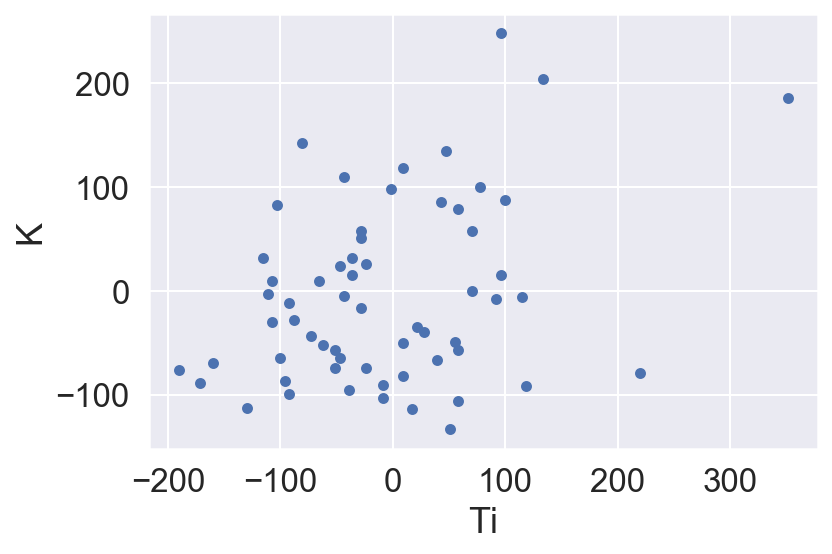

In [8]:
df.plot(kind="scatter", x=features[0], y=features[1], c='b')
plt.show()

### Rescale the data if needed

In [9]:
scaler = StandardScaler()
Xstd = scaler.fit_transform(df)

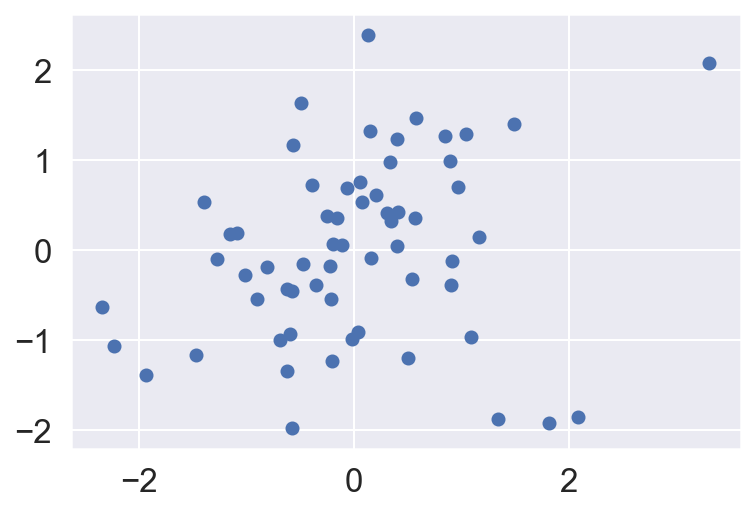

In [10]:
plt.scatter(Xstd[:, 0], Xstd[:, 1])
plt.show()

### Produce an elbow plot and decide on a suitable number of clusters

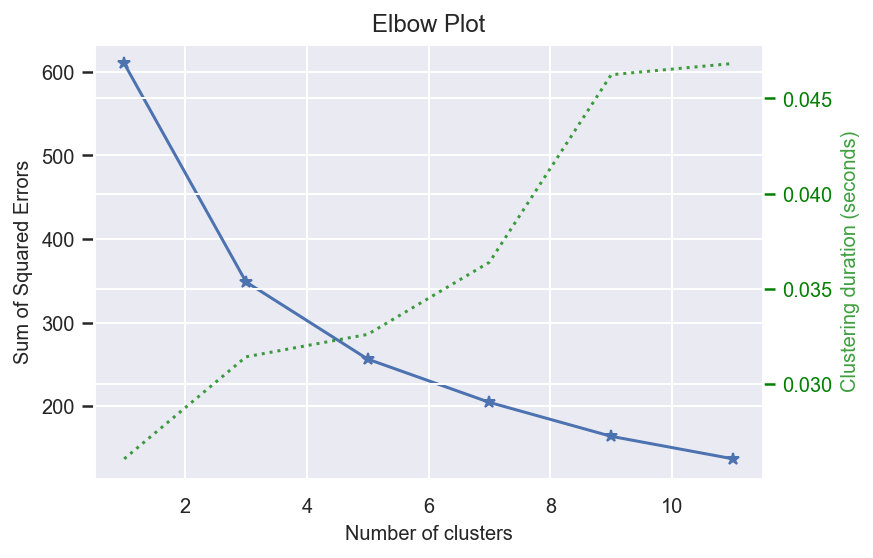

In [11]:
model = KMeans(n_clusters=3, random_state=1)

plot_elbow_curve(model, Xstd)
plt.show()

### Use the silhouette score to determine an optimal number of clusters

In [12]:
from matplotlib.colors import ListedColormap

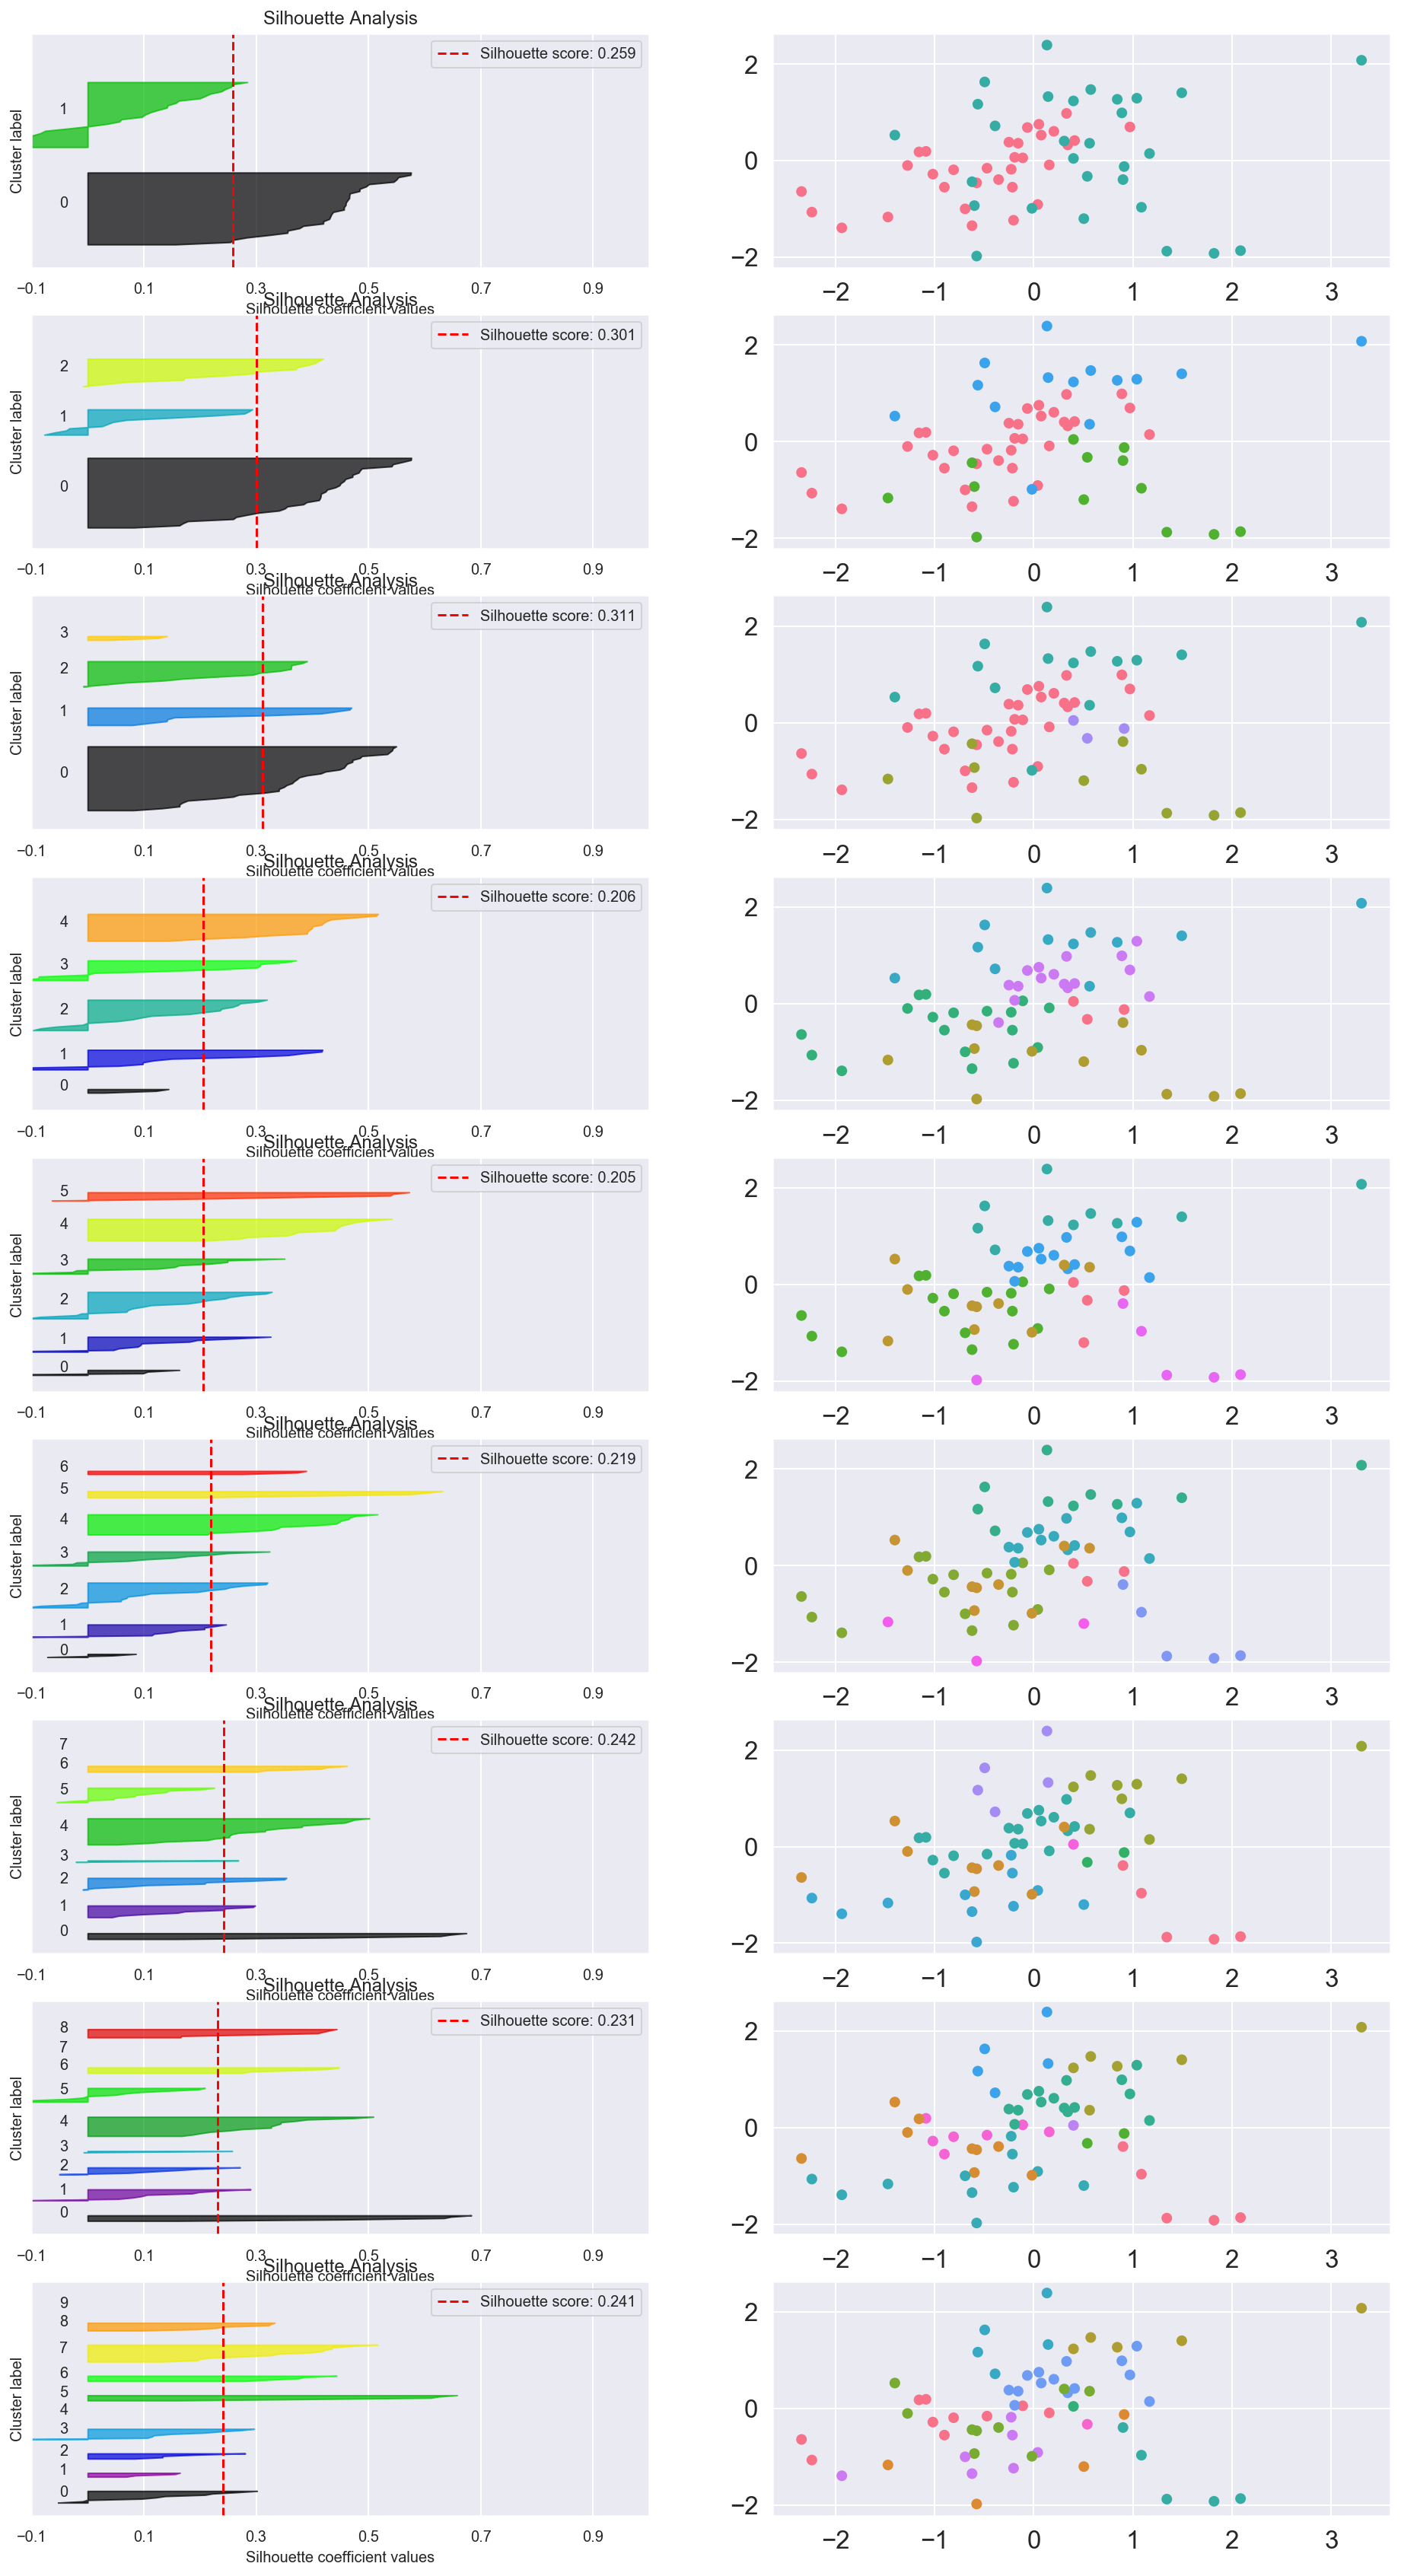

In [13]:
silhouette = []

fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(16, 30))

for k in range(2, 11):

    model = KMeans(n_clusters=k, random_state=1)
    labels = model.fit_predict(Xstd)
    silhouette.append((k, silhouette_score(Xstd, labels)))

    cmap = ListedColormap(sns.color_palette("husl", n_colors=k))
    plot_silhouette(Xstd, labels, ax=ax[k-2, 0])
    ax[k-2, 1].scatter(Xstd[:, 0], Xstd[:, 1], color=cmap(labels))

silhouette = np.array(silhouette)

In [14]:
cmap(labels)

array([[0.43328034, 0.60652734, 0.95854671, 1.        ],
       [0.68041891, 0.61514975, 0.19405452, 1.        ],
       [0.43328034, 0.60652734, 0.95854671, 1.        ],
       [0.96779756, 0.44127456, 0.53581032, 1.        ],
       [0.43328034, 0.60652734, 0.95854671, 1.        ],
       [0.46810257, 0.66994925, 0.19289587, 1.        ],
       [0.86160906, 0.53649573, 0.19548899, 1.        ],
       [0.68041891, 0.61514975, 0.19405452, 1.        ],
       [0.80049362, 0.47703364, 0.95795472, 1.        ],
       [0.21979957, 0.66251579, 0.77320932, 1.        ],
       [0.86160906, 0.53649573, 0.19548899, 1.        ],
       [0.21044754, 0.67731051, 0.64339412, 1.        ],
       [0.80049362, 0.47703364, 0.95795472, 1.        ],
       [0.86160906, 0.53649573, 0.19548899, 1.        ],
       [0.80049362, 0.47703364, 0.95795472, 1.        ],
       [0.86160906, 0.53649573, 0.19548899, 1.        ],
       [0.46810257, 0.66994925, 0.19289587, 1.        ],
       [0.43328034, 0.60652734,

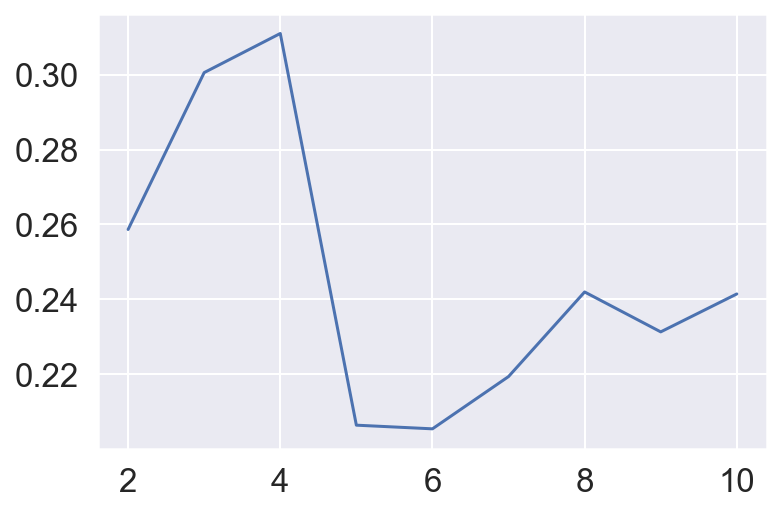

In [15]:
plt.plot(silhouette[:, 0], silhouette[:, 1])
plt.show()

### Bonus: Color the points according to the assigned labels for varying numbers of clusters

## Load the wine dataset

In [16]:
wine = pd.read_csv(
    '../../../../../resource-datasets/wine_data/winequality_merged.csv')
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


### Pull out the red wine column as a target variable

We want to compare the clustering based on the other variables against this existing label.

In [17]:
y = wine.red_wine.values

### Select the other variables to use for clustering

In [18]:
X = wine.iloc[:, :-1]

### Rescale if needed

In [19]:
scaler = StandardScaler()
Xstd = scaler.fit_transform(X)

### Produce an elbow plot and decide on a suitable number of clusters

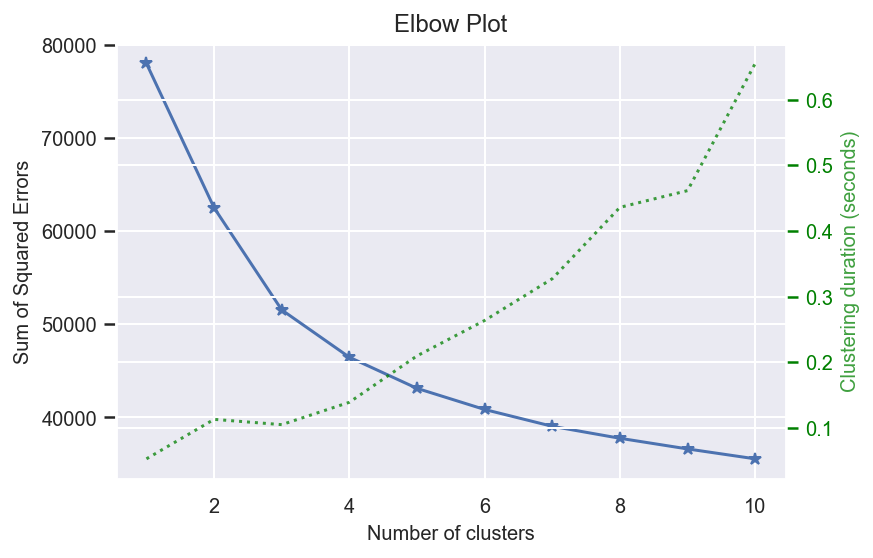

In [20]:
model = KMeans(n_clusters=3, random_state=1)

plot_elbow_curve(model, Xstd, cluster_ranges=range(1, 11))
plt.show()

### Use the silhouette score to determine an optimal number of clusters

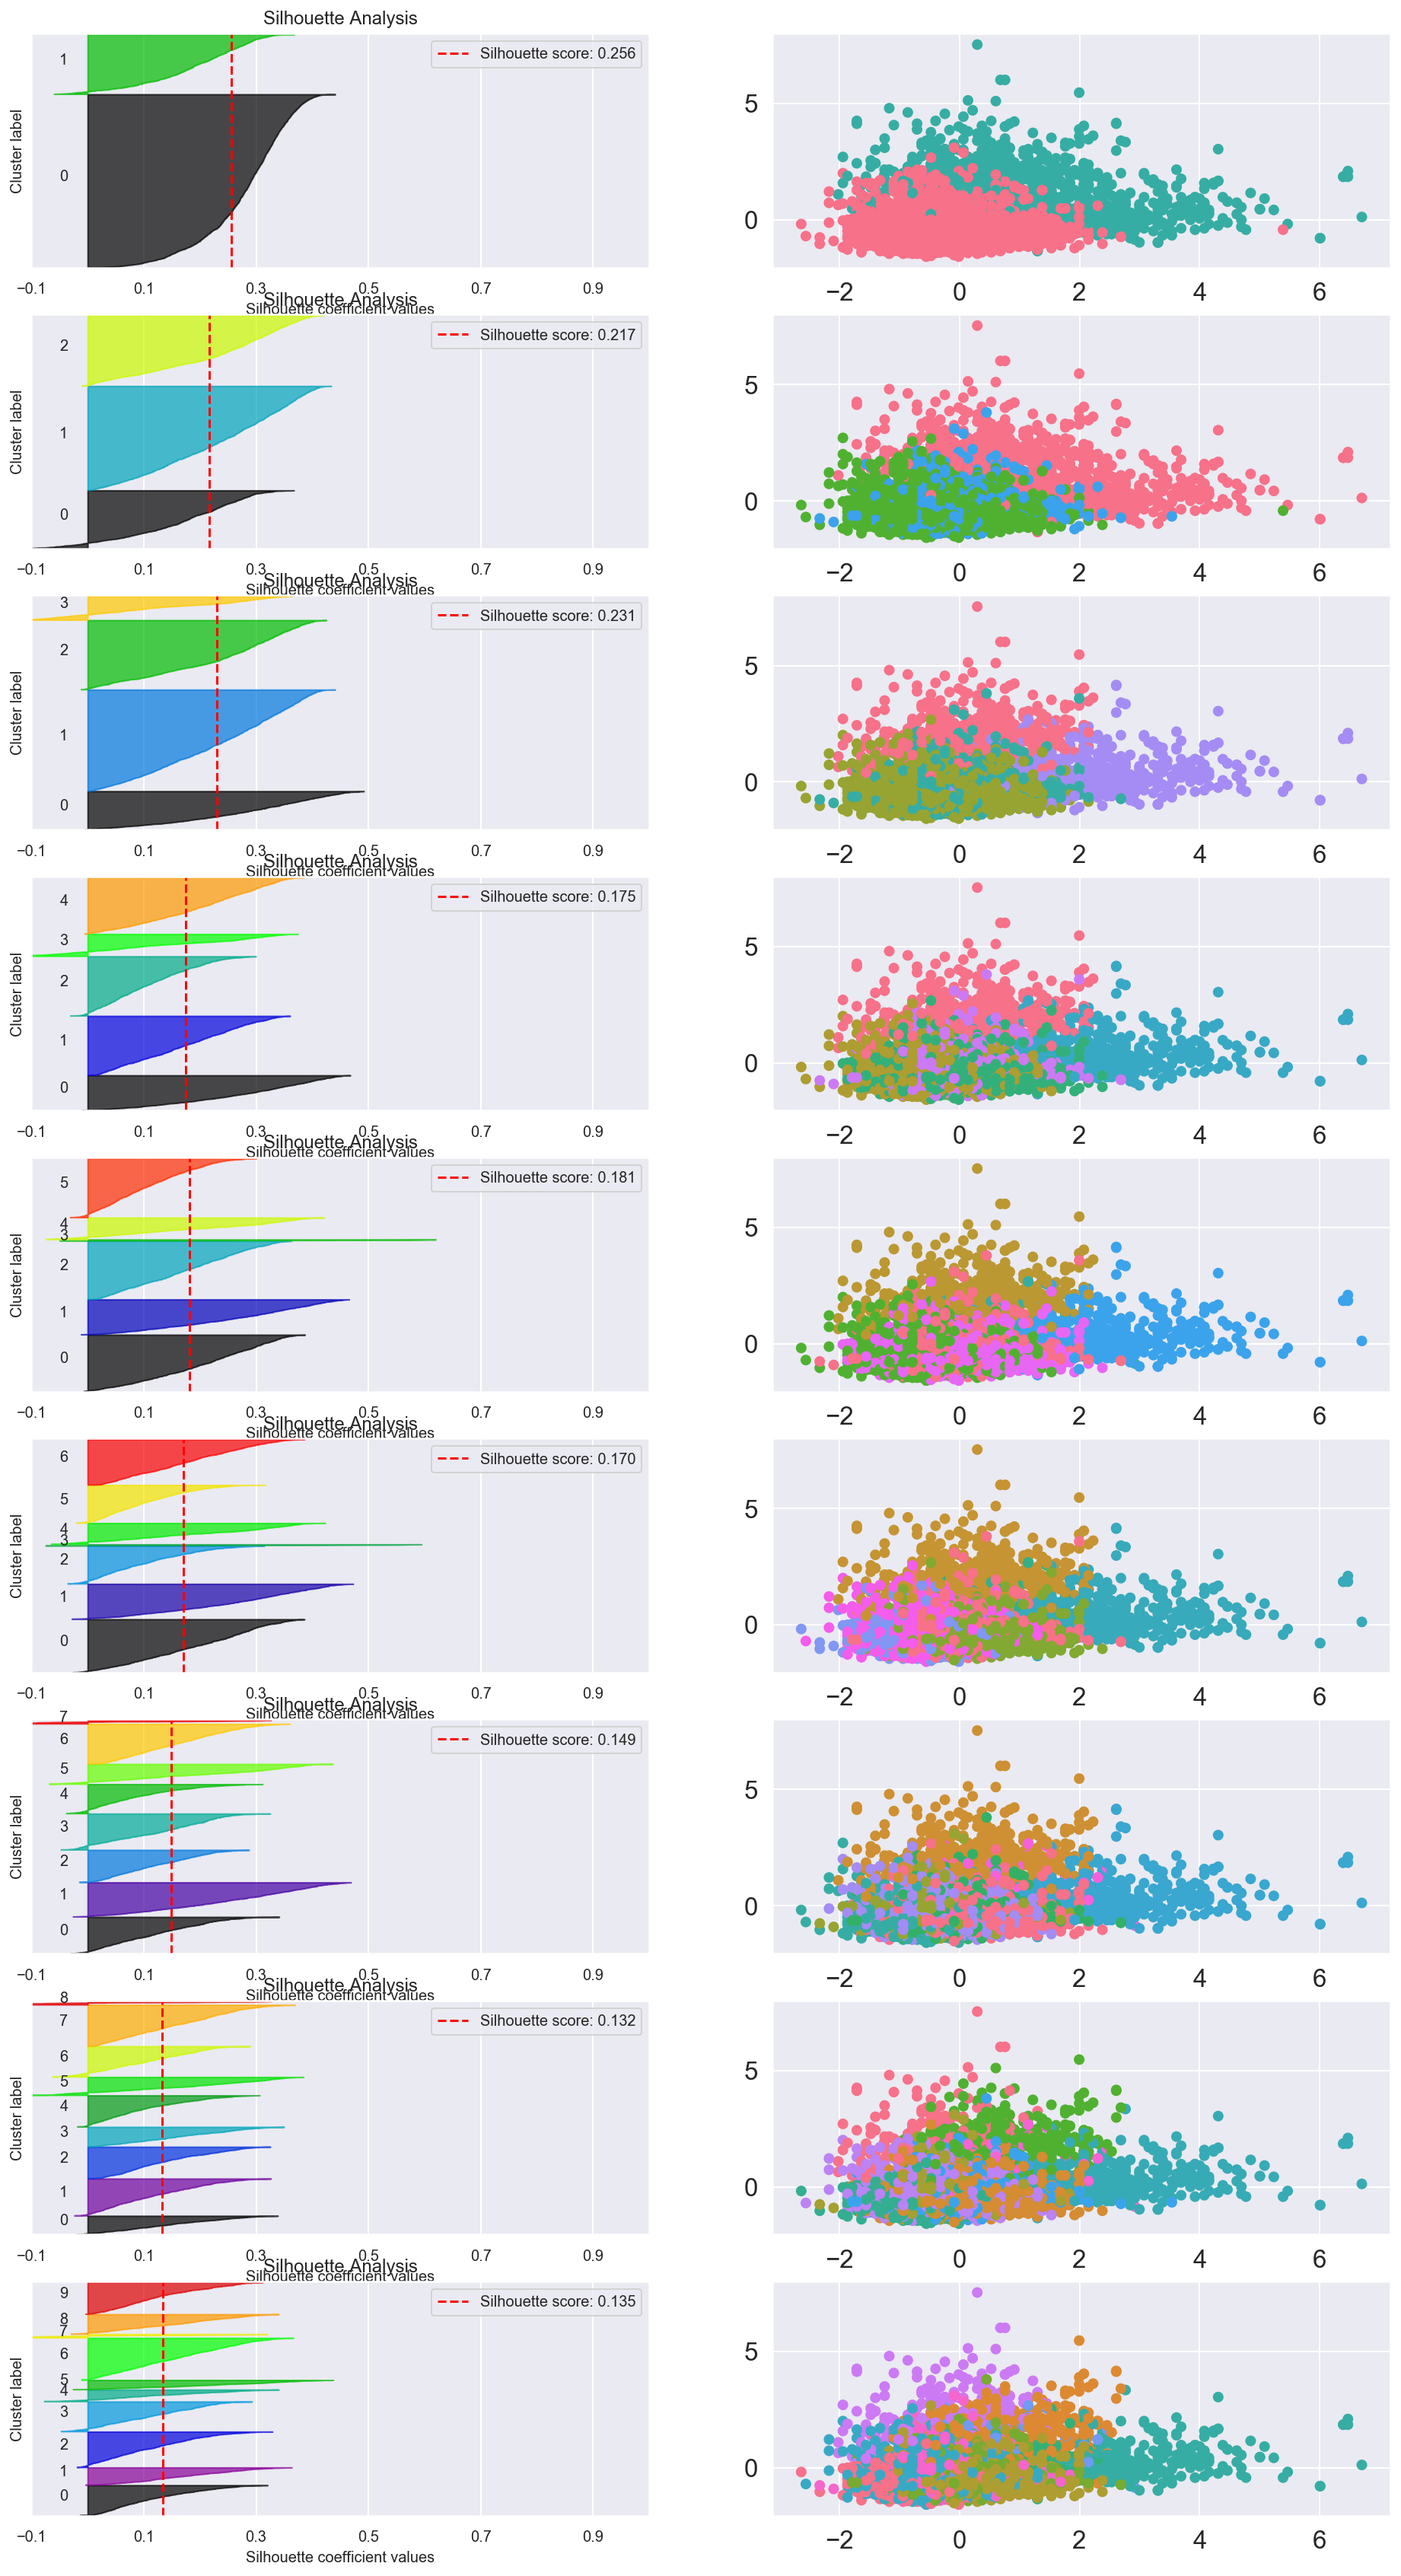

In [21]:
silhouette = []

fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(16, 30))

for k in range(2, 11):

    model = KMeans(n_clusters=k, random_state=1)
    labels = model.fit_predict(Xstd)
    silhouette.append((k, silhouette_score(Xstd, labels)))

    cmap = ListedColormap(sns.color_palette("husl", n_colors=k))
    plot_silhouette(Xstd, labels, ax=ax[k-2, 0])
    ax[k-2, 1].scatter(Xstd[:, 0], Xstd[:, 1], color=cmap(labels))

silhouette = np.array(silhouette)

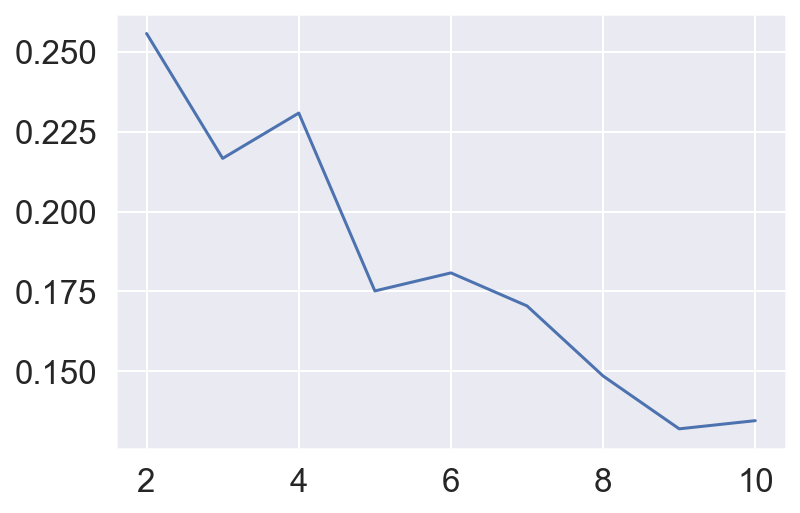

In [22]:
plt.plot(silhouette[:, 0], silhouette[:, 1])
plt.show()

### Bonus: Color the points according to the assigned labels for varying numbers of clusters

In [23]:
# see above

### Fit a KMeans model with K=2 and extract the predicted labels

In [24]:
k_wine = KMeans(n_clusters=2)
k_wine.fit(Xstd)
labels = k_wine.labels_

### Calculate the homogeneity, completeness and V-measure-score

In [25]:
homogeneity_completeness_v_measure(y, labels)

(0.8570743583845796, 0.8396386641903775, 0.8482669252973939)